## Avocado is a fruit consumed by people heavily in the United States. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

->Date - The date of the observation

->AveragePrice - the average price of a single avocado

->type - conventional or organic

->year - the year

->Region - the city or region of the observation

->Total Volume - Total number of avocados sold

->4046 - Total number of avocados with PLU 4046 sold

->4225 - Total number of avocados with PLU 4225 sold

->4770 - Total number of avocados with PLU 4770 sold

# a)To predict the average price considering the features like total bags,small bags,etc., which are given in the dataset(Regression approach)

In [284]:
# Importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [285]:
#reading a dataset
df = pd.read_csv('avocado.csv')
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


with this,we have got the target variable as "AveragePrice" which we need predict considering the features given n the dataset.

In [286]:
#since the column "Unnamed: 0" is just containing an id numbers.So, we can just remove that column from dataframe.
df = df.drop(["Unnamed: 0"],axis=1)

In [287]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [288]:
df['AveragePrice'].value_counts()

1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.05      1
3.03      1
2.91      1
0.48      1
2.96      1
Name: AveragePrice, Length: 259, dtype: int64

It seems like the output values are appearing to be dfferent for number of records

In [289]:
#to check how many rows and columns in dataframe
df.shape

(18249, 13)

looks like,its a big dataset consisting of 18249 records having 13 columns.

In [290]:
#to get the info of this dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Date          18249 non-null  object 
 1   AveragePrice  18249 non-null  float64
 2   Total Volume  18249 non-null  float64
 3   4046          18249 non-null  float64
 4   4225          18249 non-null  float64
 5   4770          18249 non-null  float64
 6   Total Bags    18249 non-null  float64
 7   Small Bags    18249 non-null  float64
 8   Large Bags    18249 non-null  float64
 9   XLarge Bags   18249 non-null  float64
 10  type          18249 non-null  object 
 11  year          18249 non-null  int64  
 12  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(3)
memory usage: 1.8+ MB


with above details,we can observe all the datatypes of each column along with memory consumption of dataset

In [291]:
#Now,we already have year column.
#So,we can break it down the data(objective type) column into month and day columns which will be more convinient,
#so that we can drop "data" column.

df['Date']=pd.to_datetime(df['Date'])  #first we can convert the objective type to date type

df['month']=df['Date'].apply(lambda x_m:x_m.month)   #getting the month values
df['day']=df['Date'].apply(lambda x_d:x_d.day)       #getting the day values

In [292]:
df = df.drop(['Date'],axis=1)

In [293]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany,11,29


In [294]:
#to get statistics information
df.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year,month,day
count,18249.000000,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,1.824900e+04,18249.000000,18249.000000,18249.000000,18249.000000
mean,1.405978,8.506440e+05,2.930084e+05,2.951546e+05,2.283974e+04,2.396392e+05,1.821947e+05,5.433809e+04,3106.426507,2016.147899,6.177215,15.662612
std,0.402677,3.453545e+06,1.264989e+06,1.204120e+06,1.074641e+05,9.862424e+05,7.461785e+05,2.439660e+05,17692.894652,0.939938,3.534130,8.776281
min,0.440000,8.456000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,2015.000000,1.000000,1.000000
25%,1.100000,1.083858e+04,8.540700e+02,3.008780e+03,0.000000e+00,5.088640e+03,2.849420e+03,1.274700e+02,0.000000,2015.000000,3.000000,8.000000
50%,1.370000,1.073768e+05,8.645300e+03,2.906102e+04,1.849900e+02,3.974383e+04,2.636282e+04,2.647710e+03,0.000000,2016.000000,6.000000,16.000000
75%,1.660000,4.329623e+05,1.110202e+05,1.502069e+05,6.243420e+03,1.107834e+05,8.333767e+04,2.202925e+04,132.500000,2017.000000,9.000000,23.000000
max,3.250000,6.250565e+07,2.274362e+07,2.047057e+07,2.546439e+06,1.937313e+07,1.338459e+07,5.719097e+06,551693.650000,2018.000000,12.000000,31.000000


with above information,we can see there no missing values in any column and we can also observe the fact that many columns contains a minimum value of even 0 value,which means the value can even go with zero amount as well.

In [295]:
#to check whether any null values present in dataframe
df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
month           0
day             0
dtype: int64

In [296]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

In [297]:
df.duplicated().sum()

0

there are no duplicate records in dataset

## Visualization

Text(0.5, 1.0, 'histogram of avg price')

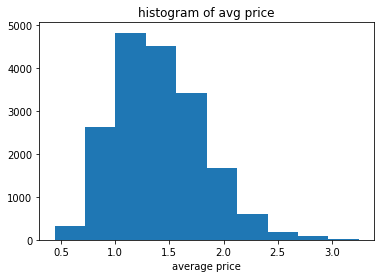

In [298]:
#visualize the histogram of wins
plt.hist(df['AveragePrice'])
plt.xlabel('average price')
plt.title('histogram of avg price')

So,values in the range of 1 to 1.5 are appearing most of the times compared with other values

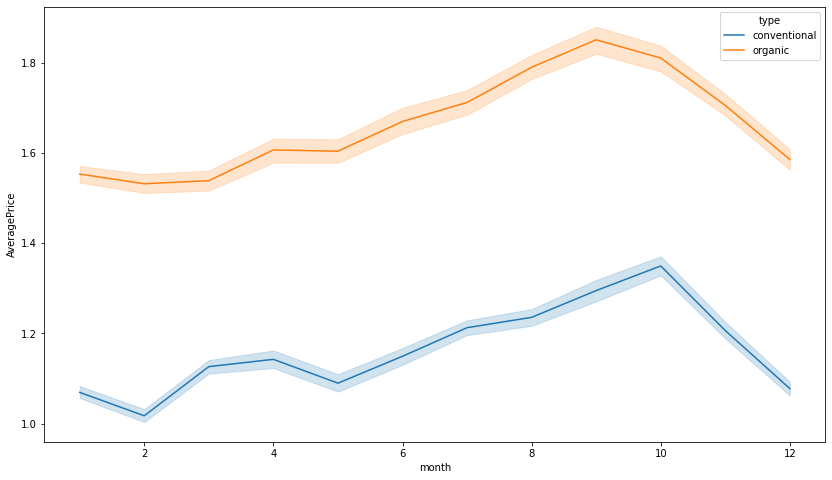

In [299]:
#usng the lineplot to see the average price variance on different months

plt.figure(figsize=(14,8))
sns.lineplot(x="month", y="AveragePrice", hue='type', data=df)
plt.show()

So,it seems like the avergae price goes to peak in month of 8(August),
9(September) and 10(october) and also the average price is much higher for organic type when compared with conventional type

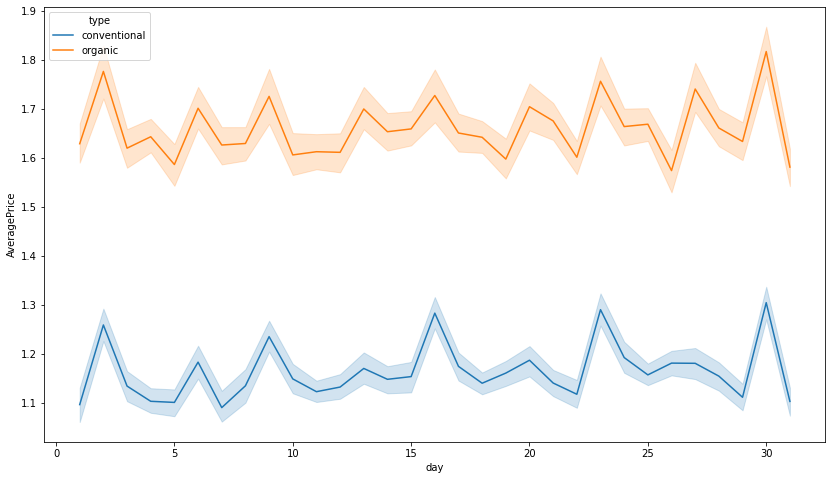

In [300]:
plt.figure(figsize=(14,8))
sns.lineplot(x="day", y="AveragePrice", hue='type', data=df)
plt.show()

So,there is no dependency on which day the average price will go up or down.

In [301]:
import warnings
warnings.filterwarnings('ignore') #to remove warning messages

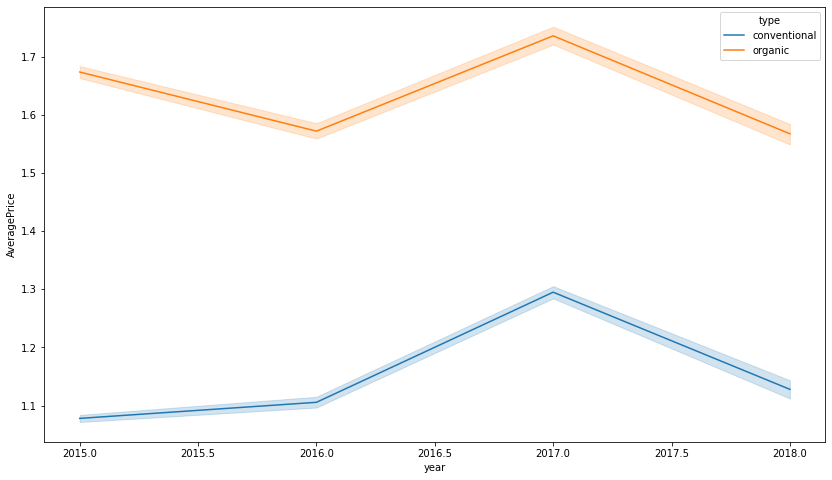

In [302]:
#with year

plt.figure(figsize=(14,8))
sns.lineplot(x="year", y="AveragePrice", hue='type', data=df)
plt.show()

With above observation,we can say that the average price was at its peak in year 2017 for types(conventional and organc) even after having all the ups and downs from last two years.

In [303]:
df['region'].value_counts().sort_values()

WestTexNewMexico       335
Denver                 338
Houston                338
Louisville             338
Albany                 338
SanFrancisco           338
LosAngeles             338
NewOrleansMobile       338
Tampa                  338
Nashville              338
Southeast              338
RichmondNorfolk        338
GreatLakes             338
Charlotte              338
Syracuse               338
LasVegas               338
Indianapolis           338
SanDiego               338
Seattle                338
Chicago                338
Northeast              338
Boise                  338
Jacksonville           338
SouthCentral           338
Portland               338
DallasFtWorth          338
Spokane                338
Atlanta                338
Philadelphia           338
Boston                 338
HarrisburgScranton     338
West                   338
PhoenixTucson          338
NorthernNewEngland     338
BaltimoreWashington    338
RaleighGreensboro      338
NewYork                338
D

so,there are equal number of records of all unique region types

In [304]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region',
       'month', 'day'],
      dtype='object')

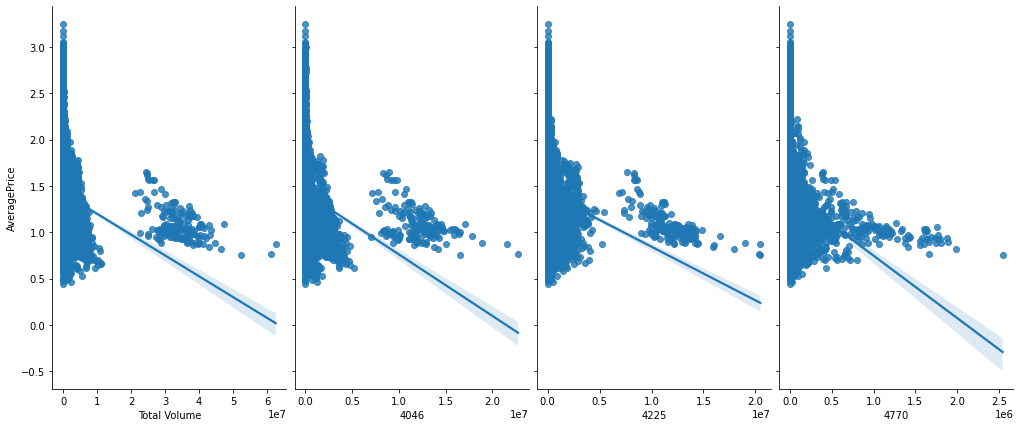

In [305]:
#Using a pairlot with regression method

sns.pairplot(df, x_vars=['Total Volume', '4046','4225','4770'], y_vars='AveragePrice', height=6, aspect=0.6, kind='reg')

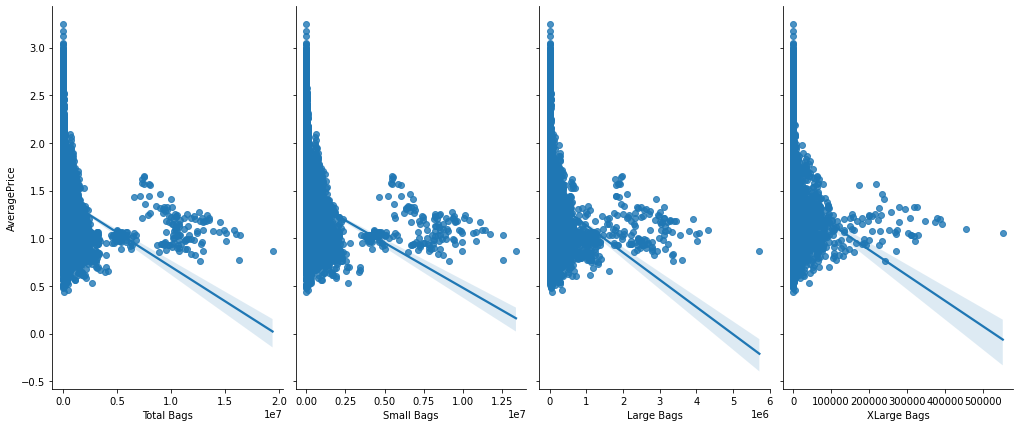

In [306]:
sns.pairplot(df, x_vars=['Total Bags', 'Small Bags','Large Bags','XLarge Bags'], y_vars='AveragePrice', height=6, aspect=0.6, kind='reg')

looks like all columns are not at all in good shape to show any kind of linearity with target variable(averageprice).

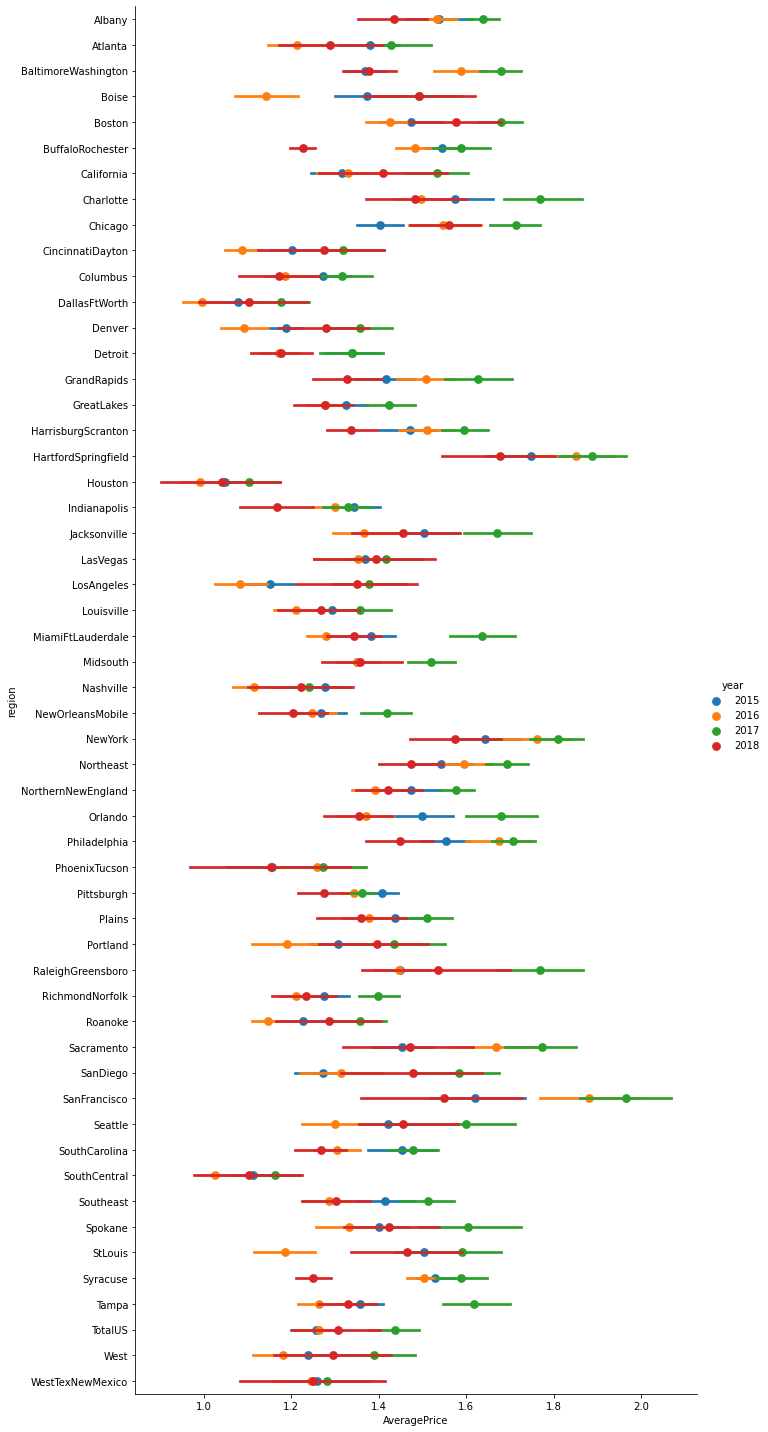

In [307]:
#with region and average price by considering the year as hue
fact_plt = sns.factorplot('AveragePrice','region',data=df,hue='year',size=20,aspect=0.5,
                  join = False 
              )

So,with ths we can say that the average price was went at its peak in some regions like SanFrancisco,HartfortSpringfield,charlotte,NewYork 
compared to other regions,also in year 2017 the price was went high in all regions with that there was a lot of demand on Avacado during the year 2017.

In [309]:
#Since there are objective type columns,so we can use Label encoder method

from sklearn.preprocessing import LabelEncoder

df['type'] = LabelEncoder().fit_transform(df['type'])
df['region'] = LabelEncoder().fit_transform(df['region'])

In [310]:
df.head()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0,12,27
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0,12,20
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0,12,13
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0,12,6
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0,11,29


## Correlation

In [311]:
df.corr()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region,month,day
AveragePrice,1.000000,-0.192752,-0.208317,-0.172928,-0.179446,-0.177088,-0.174730,-0.172940,-0.117592,0.615845,0.093197,-0.011716,0.162409,0.027386
Total Volume,-0.192752,1.000000,0.977863,0.974181,0.872202,0.963047,0.967238,0.880640,0.747157,-0.232434,0.017193,0.174176,-0.024689,-0.009747
4046,-0.208317,0.977863,1.000000,0.926110,0.833389,0.920057,0.925280,0.838645,0.699377,-0.225819,0.003353,0.192073,-0.025803,-0.010159
4225,-0.172928,0.974181,0.926110,1.000000,0.887855,0.905787,0.916031,0.810015,0.688809,-0.232289,-0.009559,0.145726,-0.022108,-0.012393
4770,-0.179446,0.872202,0.833389,0.887855,1.000000,0.792314,0.802733,0.698471,0.679861,-0.210027,-0.036531,0.095252,-0.033424,-0.009009
Total Bags,-0.177088,0.963047,0.920057,0.905787,0.792314,1.000000,0.994335,0.943009,0.804233,-0.217788,0.071552,0.175256,-0.022724,-0.004988
Small Bags,-0.174730,0.967238,0.925280,0.916031,0.802733,0.994335,1.000000,0.902589,0.806845,-0.220535,0.063915,0.164702,-0.023126,-0.003870
Large Bags,-0.172940,0.880640,0.838645,0.810015,0.698471,0.943009,0.902589,1.000000,0.710858,-0.193177,0.087891,0.198768,-0.020187,-0.008352
XLarge Bags,-0.117592,0.747157,0.699377,0.688809,0.679861,0.804233,0.806845,0.710858,1.000000,-0.175483,0.081033,0.082281,-0.012969,0.000319
type,0.615845,-0.232434,-0.225819,-0.232289,-0.210027,-0.217788,-0.220535,-0.193177,-0.175483,1.000000,-0.000032,-0.000280,-0.000085,-0.000013


In [312]:
#w.r.t "avg price"

df.corr()['AveragePrice'].sort_values()

4046           -0.208317
Total Volume   -0.192752
4770           -0.179446
Total Bags     -0.177088
Small Bags     -0.174730
Large Bags     -0.172940
4225           -0.172928
XLarge Bags    -0.117592
region         -0.011716
day             0.027386
year            0.093197
month           0.162409
type            0.615845
AveragePrice    1.000000
Name: AveragePrice, dtype: float64

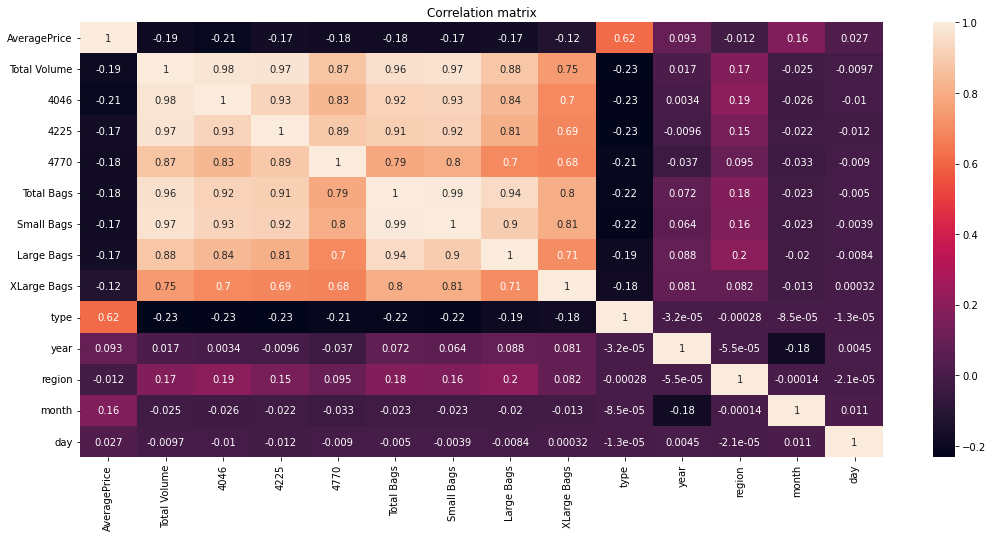

In [313]:
#plotting the correlation matrix using heatmap

corr_matrix = df.corr()
plt.figure(figsize=[18,8])
sns.heatmap(corr_matrix,annot=True)
plt.title("Correlation matrix")
plt.show()

#### with this,

#### 1)"region" has least neagtive correlation(~1%) with "averageprice".
#### 2)column "4046" has highest negative correlation(21%) with "averageprice".
#### 3)"type" has highest positive correlation(62%) with "averageprice"
#### 4)both columns like year and day have least positive correlation with "averageprice".

## Checking with outliers

In [314]:
df1 = df.iloc[:,:8]
df2 = df.iloc[:,8:]

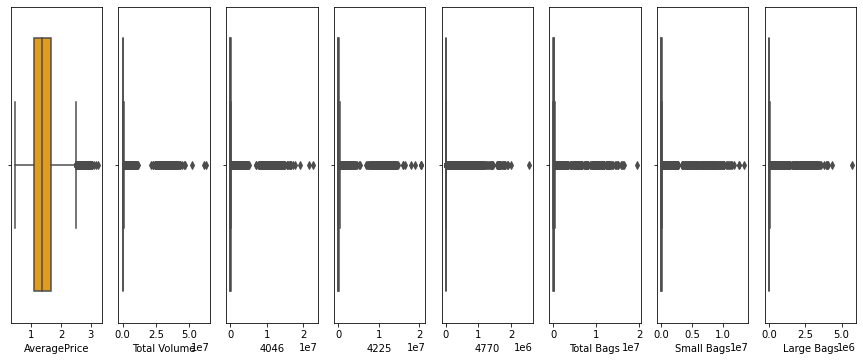

In [315]:
column_list = df1.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (1.5*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df1[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

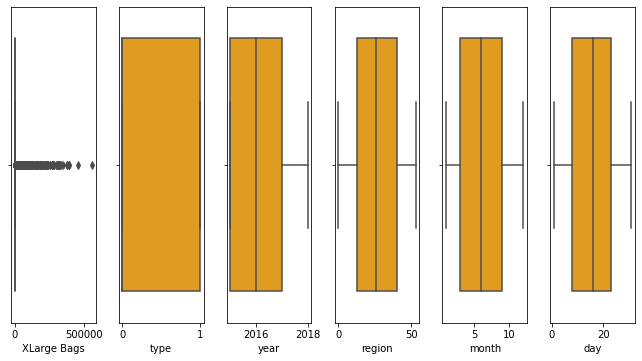

In [316]:
column_list = df2.columns.values
n_col = 31
n_row = 25
plt.figure(figsize = (1.5*n_col,4*n_col))
for i in range(len(column_list)):
  plt.subplot(n_row,n_col,i+1)
  sns.boxplot(df2[column_list[i]],color='orange',orient='h')
  plt.tight_layout()

By observing above plots,there are lot of outliers in columns like
"XLarge Bags","large bags","small bags","total bags","4770","4225",
"4046","total volume".

## checking with Skewness

In [317]:
df.skew().sort_values()

region           0.000030
type             0.000329
day              0.014310
month            0.106617
year             0.215339
AveragePrice     0.580303
4046             8.648220
4225             8.942466
Total Volume     9.007687
Small Bags       9.540660
Total Bags       9.756072
Large Bags       9.796455
4770            10.159396
XLarge Bags     13.139751
dtype: float64

there is high skewness across various columns

## Data cleaning

## Removing the outliers

In [320]:
from scipy.stats import zscore
import numpy as np
z_n = np.abs(zscore(df))
z_n.shape

threshold = 3

df_new = df[(z_n<threshold).all(axis=1)]
print(df.shape)
print(df_new.shape)

#printing the total number of dropped rows
print(df.shape[0]-df_new.shape[0])

# calcuating the percentage of data loss
loss_perc = (df.shape[0]-df_new.shape[0])/df.shape[0]*100
print("data loss percentage:{:.2f}%".format(loss_perc))

(18249, 14)
(17651, 14)
598
data loss percentage:3.28%


there is a 3.28% data loss which is good to proceed for further

## Dividing the data into features and vectors

In [386]:
y = df[["AveragePrice"]]
x = df.drop(["AveragePrice"],axis=1)

## Checking with multicollinearity

In [387]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif_value(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [388]:
calc_vif_value(x)

,variables,VIF
0,Total Volume,5.212907e+09
1,4046,6.947630e+08
2,4225,6.333557e+08
3,4770,4.973838e+06
4,Total Bags,2.502000e+14
5,Small Bags,1.429714e+14
6,Large Bags,1.521486e+13
7,XLarge Bags,7.856874e+10
8,type,2.123126e+00
9,year,1.125114e+01


with these values,we dont have to worry about multicollniearty

## Transforming data to eliminate skewness

In [389]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[-0.08660524, -0.65861896,  0.30731294, -0.24725029, -0.52400415,
        -0.34062722, -0.77335071, -0.69984934, -0.99983562, -1.22189489,
        -2.01155231,  1.49434741,  1.22928497],
       [-0.15574567, -0.77686953,  0.23164739, -0.20104091, -0.48589   ,
        -0.30642542, -0.76343481, -0.69984934, -0.99983562, -1.22189489,
        -2.01155231,  1.49434741,  0.54100493],
       [ 0.17932662, -0.73194656,  0.57950332, -0.00707235, -0.55201765,
        -0.36630323, -0.75081989, -0.69984934, -0.99983562, -1.22189489,
        -2.01155231,  1.49434741, -0.21556953],
       [ 0.00387582, -0.63419995,  0.41509958, -0.14832171, -0.69544917,
        -0.49685333, -0.69186542, -0.69984934, -0.99983562, -1.22189489,
        -2.01155231,  1.49434741, -1.09131053],
       [-0.18763999, -0.68529328,  0.22480599, -0.13791834, -0.66915713,
        -0.47720107, -0.60097539, -0.69984934, -0.99983562, -1.22189489,
        -2.01155231,  1.27843782,  1.41672699]])

In [390]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.08660524, -0.65861896,  0.30731294, ..., -2.01155231,
         1.49434741,  1.22928497],
       [-0.15574567, -0.77686953,  0.23164739, ..., -2.01155231,
         1.49434741,  0.54100493],
       [ 0.17932662, -0.73194656,  0.57950332, ..., -2.01155231,
         1.49434741, -0.21556953],
       ...,
       [-0.77150535, -0.61983119, -0.77249619, ...,  1.54383806,
        -1.64204669,  0.64284151],
       [-0.69807719, -0.55028196, -0.71054316, ...,  1.54383806,
        -1.64204669, -0.10195902],
       [-0.66380937, -0.36790819, -0.78517306, ...,  1.54383806,
        -1.64204669, -0.95485351]])

In [391]:
x_n1 = pd.DataFrame(x)
x_n1.skew()

0     0.011171
1    -0.022679
2    -0.017740
3     0.032184
4    -0.001626
5     0.007058
6    -0.073809
7     0.793520
8     0.000329
9     0.213156
10   -0.261443
11   -0.146584
12   -0.208462
dtype: float64

With these values,we can say that skewness has been removed premodominently compared to previous skew values

In [334]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
y = sc.fit_transform(y)
y

array([[-0.18868864],
       [-0.13901962],
       [-1.18206895],
       ...,
       [ 1.15237477],
       [ 1.30138182],
       [ 0.53151208]])

## Selecting a best random state

In [335]:
#importing a necessary libraries
from sklearn.linear_model import BayesianRidge 
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

#Evaluating model performance
# Now data is preprocessed and we can go for selecting best random state
Max_score = 0
maxRS = 0 #best random state value for max r2_score
for i in range(1,200):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  Bay = BayesianRidge()
  Bay.fit(x_train,y_train)
  predic = Bay.predict(x_test)
  acc = r2_score(y_test,predic)
  if acc > Max_score:
    Max_score = acc
    maxRS = i
print("Best R2_score is ",Max_score," on Random state ",maxRS)

Best R2_score is  0.593347635405569  on Random state  188


In [336]:
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size =.20,random_state=188)

In [337]:
print(x_train.shape,y_train.shape)

(14599, 13) (14599, 1)


In [338]:
print(x_test.shape,y_test.shape)

(3650, 13) (3650, 1)


In [339]:
#importing metrics
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [364]:
#to predict the wins we can consider Linearregression model

from sklearn.linear_model import LinearRegression 
LR = LinearRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_1)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_1)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_1,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_1)))

r2_score is 0.577
mse is 0.424
rmse is 0.651
mae is 0.504


In [365]:
from sklearn.model_selection import cross_val_score

In [366]:
#funtion to check accuracy of model using cross validation score

def model_accuracy(model,X_train=x_train,y_train=y_train):
    accuracies = cross_val_score(estimator = model, X = x_train, y = y_train, cv = 10) #CVS
    print("Accuracy: {:.2f} %".format(accuracies.mean()*100))
    #print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

In [367]:
model_accuracy(LR)

Accuracy: 56.67 %


In [368]:
#using BayesianRidge model 
from sklearn.linear_model import BayesianRidge 
Bay = BayesianRidge()
Bay.fit(x_train,y_train)
predic_2 = Bay.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_2)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_2)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_2,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_2)))


r2_score is 0.577
mse is 0.424
rmse is 0.651
mae is 0.504


In [369]:
model_accuracy(Bay)

Accuracy: 56.67 %


In [370]:
from sklearn.ensemble import RandomForestRegressor
RF = RandomForestRegressor()
RF.fit(x_train,y_train)
predic_3 = RF.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_3)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_3)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_3,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_3)))

r2_score is 0.897
mse is 0.103
rmse is 0.321
mae is 0.224


In [374]:
model_accuracy(RF)

Accuracy: 88.46 %


In [375]:
#using Decisiontree regressor
from sklearn.tree import DecisionTreeRegressor
DT = DecisionTreeRegressor()
DT.fit(x_train,y_train)
predic_4 = DT.predict(x_test)
print("r2_score is {:0.3f}".format(r2_score(y_test,predic_4)))
print("mse is {:0.3f}".format(mean_squared_error(y_test,predic_4)))
print("rmse is {:0.3f}".format(mean_squared_error(y_test,predic_4,squared=False)))
print("mae is {:0.3f}".format(mean_absolute_error(y_test,predic_4)))

r2_score is 0.765
mse is 0.235
rmse is 0.485
mae is 0.313


In [373]:
model_accuracy(DT)

Accuracy: 75.25 %


So,out of all these models RandomForestRegressor model has more accuracy(even after checking with CVS) and least rmse value.
So, I will take my final model as RandomForestRegressor.

## Hyper Paramter tuning

In [380]:
from sklearn.model_selection import GridSearchCV

params_list = {'bootstrap':[True,False],
               'max_depth':[1,2,3,None],
               'max_features' :['auto','sqrt','log2'],
               'max_leaf_nodes':[2,3,4,None]
              }
GCV = GridSearchCV(RandomForestRegressor(),params_list,cv=5,scoring="neg_root_mean_squared_error")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'max_leaf_nodes': None}

In [392]:
#now predicting with best parameters
GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the r2_score
r2_score(y_test,GCV_predic)

0.9066130758537027

In [393]:
import joblib
joblib.dump(GCV.best_estimator_,"Avacado_Project1.pkl")

['Avacado_Project1.pkl']




---



---





# b) To find the region considering the features given in dataset(classification approach)

In [438]:
y = df[["region"]]
x = df.drop(["region"],axis=1)

In [439]:
from sklearn.preprocessing import power_transform
x = power_transform(x)
x[:5]

array([[-0.08624822, -0.08660524, -0.65861896,  0.30731294, -0.24725029,
        -0.52400415, -0.34062722, -0.77335071, -0.69984934, -0.99983562,
        -1.22189489,  1.49434741,  1.22928497],
       [-0.03402196, -0.15574567, -0.77686953,  0.23164739, -0.20104091,
        -0.48589   , -0.30642542, -0.76343481, -0.69984934, -0.99983562,
        -1.22189489,  1.49434741,  0.54100493],
       [-1.27393796,  0.17932662, -0.73194656,  0.57950332, -0.00707235,
        -0.55201765, -0.36630323, -0.75081989, -0.69984934, -0.99983562,
        -1.22189489,  1.49434741, -0.21556953],
       [-0.79342128,  0.00387582, -0.63419995,  0.41509958, -0.14832171,
        -0.69544917, -0.49685333, -0.69186542, -0.69984934, -0.99983562,
        -1.22189489,  1.49434741, -1.09131053],
       [-0.2194403 , -0.18763999, -0.68529328,  0.22480599, -0.13791834,
        -0.66915713, -0.47720107, -0.60097539, -0.69984934, -0.99983562,
        -1.22189489,  1.27843782,  1.41672699]])

In [440]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-0.08624822, -0.08660524, -0.65861896, ..., -1.22187884,
         1.49434741,  1.22928497],
       [-0.03402196, -0.15574567, -0.77686953, ..., -1.22187884,
         1.49434741,  0.54100493],
       [-1.27393796,  0.17932662, -0.73194656, ..., -1.22187884,
         1.49434741, -0.21556953],
       ...,
       [ 1.14779044, -0.77150535, -0.61983119, ...,  1.96856389,
        -1.64204669,  0.64284151],
       [ 1.2658763 , -0.69807719, -0.55028196, ...,  1.96856389,
        -1.64204669, -0.10195902],
       [ 0.61828746, -0.66380937, -0.36790819, ...,  1.96856389,
        -1.64204669, -0.95485351]])

## Selecting a best random state

In [442]:
#importing a necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

accu_score = 0
maxRS = 0 #best random state value for max accuracy_score
for i in range(1,100):
  x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = i)
  DT = DecisionTreeClassifier()
  DT.fit(x_train,y_train)
  predic = DT.predict(x_test)
  acc = accuracy_score(y_test,predic)
  if acc > accu_score:
    accu_score = acc
    maxRS = i
print("Best accuracy_score is ",accu_score," on Random state ",maxRS)

Best accuracy_score is  0.8104109589041096  on Random state  22


In [443]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.20,random_state = 22)

In [444]:
print(x_train.shape,y_train.shape)

(14599, 13) (14599, 1)


In [445]:
print(x_test.shape,y_test.shape)

(3650, 13) (3650, 1)


In [452]:
# To predict the region,we can consider Decision tree model
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)
predic_2 = DT.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_2)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_2))
print(classification_report(y_test,predic_2))

accuracy_score is 0.816
[[57  0  0 ...  0  0  0]
 [ 0 50  0 ...  0  0  3]
 [ 0  0 58 ...  0  0  2]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 66  0]
 [ 0  1  1 ...  0  0 44]]
              precision    recall  f1-score   support

           0       0.88      0.73      0.80        78
           1       0.65      0.77      0.70        65
           2       0.81      0.91      0.85        64
           3       0.80      0.86      0.83        70
           4       0.88      0.88      0.88        76
           5       0.67      0.76      0.71        67
           6       0.97      0.95      0.96        80
           7       0.81      0.88      0.84        64
           8       0.96      0.96      0.96        68
           9       0.87      0.88      0.87        74
          10       0.73      0.73      0.73        70
          11       0.84      0.87      0.86        62
          12       0.90      0.82      0.86        68
          13       0.77      0.73      0.75        64
         

In [453]:
LR = LogisticRegression()
LR.fit(x_train,y_train)
predic_1 = LR.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_1)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_1))
print(classification_report(y_test,predic_1))

accuracy_score is 0.546
[[52  0  0 ...  0  0  0]
 [ 0 23  0 ...  0  0  0]
 [ 0  0 37 ...  0  0  4]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 64  0]
 [ 0  2  0 ...  0  0 14]]
              precision    recall  f1-score   support

           0       0.68      0.67      0.67        78
           1       0.21      0.35      0.26        65
           2       0.69      0.58      0.63        64
           3       0.54      0.43      0.48        70
           4       0.48      0.53      0.50        76
           5       0.61      0.49      0.55        67
           6       0.85      0.94      0.89        80
           7       0.44      0.56      0.50        64
           8       0.70      0.87      0.78        68
           9       0.59      0.74      0.65        74
          10       0.57      0.54      0.55        70
          11       0.51      0.65      0.57        62
          12       0.49      0.44      0.47        68
          13       0.38      0.23      0.29        64
         

In [454]:
#Using KNN Classifier
from sklearn.neighbors import KNeighborsClassifier

KN = KNeighborsClassifier()
KN.fit(x_train,y_train)
predic_3 = KN.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_3)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_3))
print(classification_report(y_test,predic_3))

accuracy_score is 0.654
[[63  0  0 ...  0  0  0]
 [ 0 41  0 ...  0  0  1]
 [ 0  0 60 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 56  0]
 [ 0  3  0 ...  0  0 32]]
              precision    recall  f1-score   support

           0       0.59      0.81      0.68        78
           1       0.38      0.63      0.47        65
           2       0.67      0.94      0.78        64
           3       0.69      0.73      0.71        70
           4       0.64      0.72      0.68        76
           5       0.48      0.55      0.51        67
           6       0.90      0.89      0.89        80
           7       0.46      0.73      0.56        64
           8       0.86      0.87      0.86        68
           9       0.42      0.57      0.48        74
          10       0.35      0.47      0.40        70
          11       0.58      0.85      0.69        62
          12       0.89      0.84      0.86        68
          13       0.46      0.45      0.46        64
         

In [456]:
#Using Random forest Classifer
from sklearn.ensemble import RandomForestClassifier

RF = RandomForestClassifier()
RF.fit(x_train,y_train)
predic_4 = RF.predict(x_test)
print("accuracy_score is {:0.3f}".format(accuracy_score(y_test,predic_4)))

#confusion matrix and classification report

print(confusion_matrix(y_test,predic_4))
print(classification_report(y_test,predic_4))

accuracy_score is 0.921
[[75  0  0 ...  0  0  0]
 [ 0 61  0 ...  0  0  0]
 [ 0  0 64 ...  0  0  0]
 ...
 [ 0  0  0 ... 59  0  0]
 [ 0  0  0 ...  0 70  0]
 [ 0  0  1 ...  0  0 58]]
              precision    recall  f1-score   support

           0       0.87      0.96      0.91        78
           1       0.84      0.94      0.88        65
           2       0.96      1.00      0.98        64
           3       0.89      0.91      0.90        70
           4       0.96      0.99      0.97        76
           5       0.88      0.79      0.83        67
           6       0.98      0.99      0.98        80
           7       0.89      0.92      0.91        64
           8       0.99      1.00      0.99        68
           9       0.96      0.92      0.94        74
          10       0.78      0.84      0.81        70
          11       0.92      0.97      0.94        62
          12       0.99      0.97      0.98        68
          13       0.88      0.81      0.85        64
         

Randomforest model has more accuracy then all these models

## Cross Validation to check with overfitting

In [457]:
from sklearn.model_selection import cross_val_score

#for Logistic regression model
L_cr = cross_val_score(LR,x,y,cv=5)
print("cross validation for Logistics regression model : ",L_cr.mean())

cross validation for Logistics regression model :  0.4065919805388603


In [458]:
L_cr = cross_val_score(KN,x,y,cv=5)
print("cross validation for KNN classifier model : ",L_cr.mean())

cross validation for KNN classifier model :  0.4462659614005714


In [459]:
L_cr = cross_val_score(DT,x,y,cv=5)
print("cross validation for Decision tree model : ",L_cr.mean())

cross validation for Decision tree model :  0.5466527065024382


In [460]:
L_cr = cross_val_score(RF,x,y,cv=5)
print("cross validation for Random forest model : ",L_cr.mean())

cross validation for Random forest model :  0.6777250288125477


with this,I can conclude that my final model is Random forest.

## Hyper parameter tuning

In [ ]:
from sklearn.model_selection import GridSearchCV

params_list = {'criterion':['gini','entropy'],
               'max_features':['auto','sqrt','log2'],
               'min_impurity_decrease':[0.0,0.1,0.2,0.3],
               'max_depth':[1,2,3,4,None]}
GCV = GridSearchCV(RandomForestClassifier(),params_list,cv=5,scoring="accuracy")
GCV.fit(x_train,y_train)

#printing the best parameter
GCV.best_params_

Since the datset s very large and also Im not even able to tune even a single and its taking a way too much of time. 

In [ ]:
#now predicting with best parameters

GCV_predic = GCV.best_estimator_.predict(x_test)

#getting the final accuracy
accuracy_score(y_test,GCV_predic)
#f1_score(y_test,GCV_predic)

In [ ]:
from sklearn.metrics import plot_roc_curve
plot_roc_curve(GCV.best_estimator_,x_test,y_test)
plt.title("ROC AUC plot")
plt.show()

In [ ]:
import joblib
joblib.dump(GCV.best_estimator_,"HR_Analytics_Project2.pkl")